In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import enet_path

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
object = StandardScaler()


In [2]:
df = pd.read_excel('Zmb_Social_media_dataset.xlsx')
df

wealth_index  all_population_count_2015  annual_precipitation_2015  \
0        1.541667                   15413.10                    68.7000   
1        2.173913                    7093.53                    79.6667   
2        2.840000                     162.15                    82.0667   
3        5.000000                   28552.40                    59.8500   
4        1.125000                    1972.73                    87.7583   
..            ...                        ...                        ...   
530      4.666667                  116188.00                    24.6083   
531      1.523810                    6623.06                    58.2917   
532      3.291667                   15832.40                    23.2417   
533      1.541667                    1998.33                    87.8833   
534      2.041667                    9872.70                    58.7000   

     aridity_2015  built_population_2014  day_land_surface_temp_2015  \
0        17.28300               0.000026                     32.1875   
1        21.87640               0.007313                     28.2772   
2        22.23020           -9999.000000                  -9999.0000   
3        15.71550               0.472284                     31.9700   
4        24.43390               0.000000                     28.3157   
..            ...                    ...                         ...   
530       6.25636               0.530353                     30.1700   
531      15.40750               0.000091                     33.9245   
532       5.77433               0.011310                     31.0267   
533      24.46870               0.000000                     28.9911   
534      16.38140               0.000000                     30.2802   

     diurnal_temperature_range_2015  drought_episodes  \
0                           12.9917                 5   
1                           14.2167                 9   
2                           11.6167                 4   
3                           14.8250                 9   
4                           13.3583                 9   
..                              ...               ...   
530                         14.0750                 5   
531                         12.1833                 7   
532                         14.1500                 5   
533                         13.1917                 5   
534                         11.8750                 7   

     enhanced_vegetation_index_2015  frost_days_2015  ...  CENTRAL  \
0                            3152.7         0.000000  ...        0   
1                            3402.0         0.042500  ...        0   
2                           -9999.0         0.000000  ...        0   
3                            2585.0         0.040833  ...        1   
4                            3527.0         0.000000  ...        1   
..                              ...              ...  ...      ...   
530                          2560.0         0.014167  ...        0   
531                          3010.6         0.000000  ...        0   
532                          3003.4         0.020833  ...        0   
533                          3483.0         0.000000  ...        1   
534                          3255.3         0.000000  ...        0   

     COPPERBELT  EASTERN  LUAPULA  LUSAKA  MUCHINGA  NORTHERN  NORTHWESTERN  \
0             0        1        0       0         0         0             0   
1             1        0        0       0         0         0             0   
2             0        0        0       0         0         1             0   
3             0        0        0       0         0         0             0   
4             0        0        0       0         0         0             0   
..          ...      ...      ...     ...       ...       ...           ...   
530           0        0        0       1         0         0             0   
531           0        0        0       0         1         0             0   
53

In [3]:
target1=['count_id_10k','mean_gov_policy4_10k','mean_election_corruption9_10k','mean_public_health16_10k','mean_social_inequality18_10k','mean_food_system22_10k','mean_social_progress61_10k','mean_mining66_10k']

In [4]:
df=df.dropna()
df

wealth_index  all_population_count_2015  annual_precipitation_2015  \
1        2.173913                    7093.53                    79.6667   
2        2.840000                     162.15                    82.0667   
3        5.000000                   28552.40                    59.8500   
5        3.857143                   11525.80                    58.7000   
6        4.416667                    3711.09                    28.1917   
..            ...                        ...                        ...   
526      3.320000                   16100.80                    24.6083   
528      2.217391                    9133.18                    39.0833   
529      4.750000                  126717.00                    24.6083   
530      4.666667                  116188.00                    24.6083   
532      3.291667                   15832.40                    23.2417   

     aridity_2015  built_population_2014  day_land_surface_temp_2015  \
1        21.87640               0.007313                     28.2772   
2        22.23020           -9999.000000                  -9999.0000   
3        15.71550               0.472284                     31.9700   
5        16.38140               0.216761                     30.8133   
6         6.41935               0.008124                     30.5433   
..            ...                    ...                         ...   
526       6.25636               0.027686                     32.3006   
528      10.19570               0.000000                     33.5124   
529       6.25636               0.595757                     31.3400   
530       6.25636               0.530353                     30.1700   
532       5.77433               0.011310                     31.0267   

     diurnal_temperature_range_2015  drought_episodes  \
1                           14.2167                 9   
2                           11.6167                 4   
3                           14.8250                 9   
5                           11.8750                 7   
6                           13.3750                 5   
..                              ...               ...   
526                         14.0750                 5   
528                         15.5167                 5   
529                         14.0750                 5   
530                         14.0750                 5   
532                         14.1500                 5   

     enhanced_vegetation_index_2015  frost_days_2015  ...  CENTRAL  \
1                           3402.00         0.042500  ...        0   
2                          -9999.00         0.000000  ...        0   
3                           2585.00         0.040833  ...        1   
5                           3026.00         0.000000  ...        0   
6                           2305.00         0.000000  ...        0   
..                              ...              ...  ...      ...   
526                         3003.08         0.014167  ...        0   
528                         2516.42         0.446667  ...        0   
529                         2271.00         0.014167  ...        0   
530                         2560.00         0.014167  ...        0   
532                         3003.40         0.020833  ...        0   

     COPPERBELT  EASTERN  LUAPULA  LUSAKA  MUCHINGA  NORTHERN  NORTHWESTERN  \
1             1        0        0       0         0         0             0   
2             0        0        0       0         0         1             0   
3             0        0        0       0         0         0             0   
5             0        0        0       0         1         0             0   
6             0        0        0       0         0         0             0   
..          ...      ...      ...     ...       ...       ...           ...   
526           0        0        0       1         0         0             0   
528           0        0        0       0         0         0             0   
52

In [5]:
features=df.columns.to_list()

In [6]:
columns = [i for i in features if i not in target1]

In [7]:
train_ix, test_ix = train_test_split(range(df.shape[0]), test_size = 0.2, random_state = 48)

In [8]:
def ridge(df1,columns,target):
    rdf1=pd.DataFrame(columns=['name','ridge_alpha','R2', 'adj_R2','mean val MSE','test MSE','test MAE']+columns)
    x = df1[:, 1:]
    y = df1[:,0]
    coefs=[]
    X_train = df1[train_ix, 1:]
    X_test = df1[test_ix, 1:]
    y_train = df1[train_ix,0] 
    y_test = df1[test_ix,0]

    for ridge_alpha in float(10)**np.arange(-6, 5):
        sample_size = len(y)
        kf = KFold(n_splits=10, shuffle=True)
        MSE_kf = 0
        for train_index, val_index in kf.split(X_train):
            # Ridge
            ridge_solver = 'cholesky'

            X_train_t=X_train[train_index]
            y_train_t=y_train[train_index]        
            X_train_v=X_train[val_index]
            y_train_v=y_train[val_index]

            clf = Ridge(alpha=ridge_alpha,fit_intercept=True,normalize='deprecated',copy_X=True, max_iter=1000, tol=0.001, solver=ridge_solver)
            clf.fit(X_train_t, y_train_t)
            coefs.append(clf.coef_)
            MSE_kf += mean_squared_error(y_train_v, clf.predict(X_train_v))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Rsq = r2_score(y_test, y_pred)
        evaluation_dict = {'name':f'Ridge_Model: {target}','ridge_alpha':ridge_alpha,'R2':r2_score(y_test, y_pred), 'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                            'mean val MSE' : MSE_kf/10, 'test MSE' : mean_squared_error(y_test, y_pred), 
                            'test MAE' : mean_absolute_error(y_test, y_pred)
                            }
        
        for i in range(len(columns)):
                    evaluation_dict[columns[i]] = clf.coef_[i] 

        ridge_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
        rdf1=pd.concat([rdf1, ridge_evaluation_df], axis=0)
    rdf1=rdf1.sort_values(by=['mean val MSE'])
    return rdf1


In [9]:
def enet(df1,columns,target):
    edf1=pd.DataFrame(columns=['name','elastic_net_alpha','elastic_net_l1_ratio' ,'R2','adj_R2','mean val MSE','test MSE','test MAE']+columns)
    elastic_net_l1_ratio = 0.1
    x = df1[:, 1:]
    y = df1[:,0]
    X_train = df1[train_ix, 1:]
    X_test = df1[test_ix, 1:]
    y_train = df1[train_ix,0] 
    y_test = df1[test_ix,0]
    while elastic_net_l1_ratio<=1:
        eps = 5e-3  # the smaller it is the longer is the path
        alphas_enet, coefs_enet, _ = enet_path(x, y, eps=eps, l1_ratio=elastic_net_l1_ratio)
        for elastic_net_alpha in alphas_enet:
            kf = KFold(n_splits=10, shuffle=True)
            MSE_kf = 0
            for train_index, val_index in kf.split(X_train):
                X_train_t=X_train[train_index]
                y_train_t=y_train[train_index]        
                X_train_v=X_train[val_index]
                y_train_v=y_train[val_index]
                clf = ElasticNet(alpha=elastic_net_alpha, l1_ratio=elastic_net_l1_ratio, fit_intercept=True, precompute=False, 
                                max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, 
                                selection='cyclic')
                clf.fit(X_train_t, y_train_t)
                MSE_kf += mean_squared_error(y_train_v, clf.predict(X_train_v))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # pred_df = pd.DataFrame(data=[y_pred, y_test]).T
            # pred_df.columns=[f'predicted_{target}',target]
            # pred_df['error_per_obs'] = pred_df[target] - pred_df[f'predicted_{target}']
            Rsq = r2_score(y_test, y_pred)
            evaluation_dict = {'name':f'ENet_Model: {target}','elastic_net_alpha':elastic_net_alpha,'elastic_net_l1_ratio':elastic_net_l1_ratio ,
                                'R2':r2_score(y_test, y_pred),'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                                'mean val MSE' : MSE_kf/10, 'test MSE' : mean_squared_error(y_test, y_pred), 
                                'test MAE' : mean_absolute_error(y_test, y_pred)}
            
            for i in range (len(columns)):
                evaluation_dict[columns[i]] = clf.coef_[i] 
            
            enet_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
            edf1=pd.concat([edf1, enet_evaluation_df], axis=0)
        elastic_net_l1_ratio+=0.1
    edf1=edf1.sort_values(by=['mean val MSE'])
    return edf1

In [10]:
def random_search(df1_1,columns,target):
    n_folds = 10  
    grid = {'n_estimators': [49, 100, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1], # default 0.1
            'max_depth': [3, 5, 7],  # default 3
            'min_child_weight': [1, 3, 5],
            'gamma': [0.0, 0.1, 0.2],
            'subsample': [0.5, 0.7],
            'colsample_bytree': [0.5, 0.7]
            }

    x = df1_1[:, 1:]
    y = df1_1[:,0]
    X_train =df1_1[train_ix, 1:]
    X_test = df1_1[test_ix, 1:]
    y_train = df1_1[train_ix,0] 
    y_test = df1_1[test_ix,0]

    model = xgb.XGBRegressor()
    search = RandomizedSearchCV(model, grid, scoring='neg_mean_squared_error', n_jobs=-1)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    results = search.fit(X_train, y_train)
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
    }
    num_boost_round = results.best_params_['n_estimators'] 
    params['subsample'] = results.best_params_['subsample']
    params['min_child_weight'] = results.best_params_['min_child_weight']
    params['max_depth'] = results.best_params_['max_depth']
    params['learning_rate'] = results.best_params_['learning_rate']
    params['gamma'] = results.best_params_['gamma']
    params['colsample_bytree'] = results.best_params_['colsample_bytree']

    cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, nfold=n_folds, metrics='rmse', seed=42)
    rmse_mean = cv_results['test-rmse-mean']
    avg_rmse = sum(rmse_mean) / num_boost_round
    mse_mean = [rmse**2 for rmse in rmse_mean]
    avg_mse = sum(mse_mean) / num_boost_round

    model = xgb.train(params, dtrain, num_boost_round=100)

    y_pred = model.predict(dtest)
    
    Rsq = r2_score(y_test, y_pred)
    features=columns
    ax=xgb.plot_importance(model, importance_type='weight')
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(len(labels)):
        labels[i] = features[i]
        
    # ax.set_yticklabels(labels)    
    importance_gain = model.get_score(importance_type='gain')
    imp=importance_gain.values()
    imp=list(imp)
    print(importance_gain)
    importance_weight = model.get_score(importance_type='weight') # weight is default, you can try "gain" or "cover"
    print(importance_weight)
    xgn1_1=pd.DataFrame(columns=['name','num_boost_round','subsample','min_child_weight','max_depth','learning_rate','gamma','colsample_bytree','R2', 'adj_R2','Avg RMSE','mean val MSE','test MSE','test MAE'])
    evaluation_dict = {'name':f'xgn_Model Random: {target}','num_boost_round':num_boost_round,'subsample':params['subsample'],'min_child_weight':params['min_child_weight'],'max_depth':params['max_depth'],'learning_rate':params['learning_rate'],'gamma':params['gamma'],'colsample_bytree':params['colsample_bytree'],'R2':r2_score(y_test, y_pred), 'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                       'Avg RMSE':avg_rmse,'mean val MSE' :avg_mse, 'test MSE' : mean_squared_error(y_test, y_pred), 'test MAE' : mean_absolute_error(y_test, y_pred)
                        }
    sort_dict={}
    for i in range(len(labels)):
      sort_dict[labels[i]] = imp[i] 

    keys = list(sort_dict.keys())
    values = list(sort_dict.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}     
    res = dict(reversed(list(sorted_dict.items())))
    
    evaluation_dict.update(res) 
                
    ridge_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
    xgn1_1=pd.concat([xgn1_1, ridge_evaluation_df], axis=0)
    return xgn1_1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e-02, tolerance: 2.432e-02
  model = cd_fast.enet_coordinate_descent(


{'f0': 1.6749683618545532, 'f1': 8.300509452819824, 'f2': 4.53534460067749, 'f3': 3.0711236000061035, 'f4': 1.045483112335205, 'f5': 2.4631590843200684, 'f6': 0.9363595247268677, 'f7': 0.2422313690185547, 'f8': 2.3729848861694336, 'f9': 3.543268918991089, 'f11': 1.4251946210861206, 'f12': 5.824337482452393, 'f13': 0.7240035533905029, 'f14': 50.86069869995117, 'f15': 33.567020416259766, 'f17': 36.16126251220703, 'f18': 56.52460479736328, 'f19': 5.438920021057129, 'f20': 0.5881249904632568, 'f21': 0.2488417625427246, 'f23': 0.621746838092804, 'f24': 20.335613250732422, 'f25': 2.503455638885498, 'f26': 5.035335063934326, 'f27': 5.351223945617676, 'f31': 0.30159488320350647, 'f33': 0.29618215560913086, 'f37': 0.32743310928344727, 'f38': 0.3041238784790039, 'f39': 0.48264482617378235, 'f40': 52.35859298706055, 'f41': 31.664987564086914, 'f42': 0.25669217109680176, 'f43': 0.16053326427936554, 'f47': 11.178153038024902}
{'f0': 20.0, 'f1': 54.0, 'f2': 31.0, 'f3': 11.0, 'f4': 9.0, 'f5': 4.0, 'f

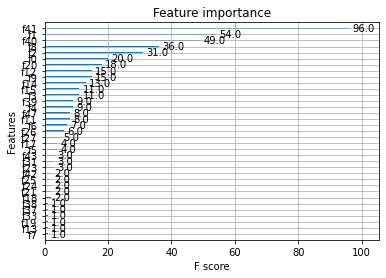

In [11]:
target=target1[0]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf0 = ridge(df1,columns,target)
edf0 = enet(df1,columns,target)
xgb0 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.218e-02, tolerance: 3.342e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.890e-02, tolerance: 3.352e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 7.4691243171691895, 'f1': 21.703746795654297, 'f3': 0.061930060386657715, 'f4': 0.16737869381904602, 'f5': 12.467001914978027, 'f6': 0.4013676643371582, 'f7': 0.519300103187561, 'f8': 12.08972454071045, 'f9': 0.15146224200725555, 'f10': 0.03153860569000244, 'f12': 0.015219515189528465, 'f13': 0.2634579539299011, 'f14': 9.250519752502441, 'f15': 8.894111633300781, 'f16': 0.0032606124877929688, 'f17': 10.65180778503418, 'f18': 4.027997016906738, 'f19': 7.700279235839844, 'f20': 0.13538625836372375, 'f21': 0.13348251581192017, 'f22': 0.11628405004739761, 'f23': 7.776161193847656, 'f24': 0.23351779580116272, 'f25': 17.080896377563477, 'f26': 7.264830589294434, 'f27': 0.08499947190284729, 'f28': 0.32147958874702454, 'f29': 2.0890610218048096, 'f30': 6.856240272521973, 'f31': 0.025893688201904297, 'f33': 18.994016647338867, 'f34': 0.37214037775993347, 'f35': 0.19917063415050507, 'f37': 0.050682902336120605, 'f38': 0.15526922047138214, 'f39': 10.089550971984863, 'f40': 4.94252300262451

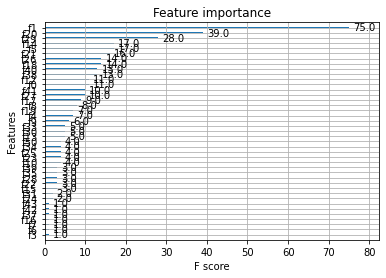

In [12]:
target=target1[1]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf1 = ridge(df1,columns,target)
edf1 = enet(df1,columns,target)
xgb1 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.708e-02, tolerance: 3.170e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.623e-02, tolerance: 3.122e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 30.824047088623047, 'f1': 6.218483924865723, 'f2': 44.690547943115234, 'f3': 18.893861770629883, 'f4': 19.211427688598633, 'f5': 0.7748589515686035, 'f6': 2.6658389568328857, 'f7': 0.26556116342544556, 'f8': 2.5512096881866455, 'f9': 2.2760066986083984, 'f10': 0.1687687188386917, 'f11': 1.5940567255020142, 'f12': 3.3291563987731934, 'f13': 28.715055465698242, 'f14': 2.1346585750579834, 'f15': 2.6334238052368164, 'f17': 2.9762823581695557, 'f18': 2.0084054470062256, 'f19': 2.130941867828369, 'f20': 2.6293745040893555, 'f21': 1.550403356552124, 'f22': 1.559691309928894, 'f23': 2.491245985031128, 'f24': 1.5662761926651, 'f25': 2.4372427463531494, 'f26': 1.4892582893371582, 'f27': 1.9946991205215454, 'f28': 1.7415869235992432, 'f29': 2.115375518798828, 'f30': 12.753750801086426, 'f31': 2.94305419921875, 'f32': 6.061156749725342, 'f33': 2.5537338256835938, 'f34': 6.006636619567871, 'f35': 2.167652130126953, 'f36': 28.059701919555664, 'f37': 23.88934898376465, 'f38': 2.452831983566284

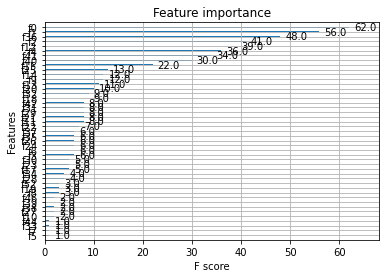

In [13]:
target=target1[2]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf2 = ridge(df1,columns,target)
edf2 = enet(df1,columns,target)
xgb2 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e-02, tolerance: 2.461e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.340e-02, tolerance: 2.586e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 1.2014341354370117, 'f1': 1.3214882612228394, 'f2': 1.4731168746948242, 'f3': 0.3747946321964264, 'f4': 1.8899706602096558, 'f5': 1.8412196636199951, 'f6': 1.9441510438919067, 'f7': 1.6346150636672974, 'f8': 2.5396909713745117, 'f9': 1.1569507122039795, 'f10': 0.31917330622673035, 'f11': 0.685771644115448, 'f12': 0.7880202531814575, 'f13': 1.1119112968444824, 'f14': 1.0868951082229614, 'f15': 1.0288755893707275, 'f17': 0.4575861394405365, 'f18': 1.8718061447143555, 'f19': 1.0360459089279175, 'f20': 3.284740686416626, 'f21': 2.5810983180999756, 'f22': 2.146244764328003, 'f23': 0.5252687335014343, 'f24': 0.7580891847610474, 'f25': 2.366173505783081, 'f26': 1.348925232887268, 'f27': 1.7728382349014282, 'f28': 0.6593154072761536, 'f29': 0.7648393511772156, 'f30': 1.5994340181350708, 'f31': 2.017526626586914, 'f32': 1.6334203481674194, 'f33': 0.48053017258644104, 'f34': 0.6060596108436584, 'f35': 0.4848251938819885, 'f36': 0.9459589123725891, 'f37': 0.6859354376792908, 'f38': 1.74359

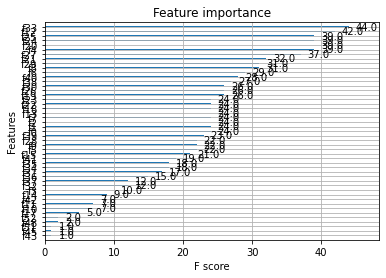

In [14]:
target=target1[3]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf3 = ridge(df1,columns,target)
edf3 = enet(df1,columns,target)
xgb3 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.118e-03, tolerance: 7.659e-03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.784e-03, tolerance: 3.078e-03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 0.7509994506835938, 'f1': 0.4237959384918213, 'f2': 0.5571706295013428, 'f3': 0.7290576696395874, 'f4': 1.2125567197799683, 'f5': 0.48747044801712036, 'f6': 0.507330596446991, 'f7': 0.1733994483947754, 'f8': 0.8793131113052368, 'f9': 0.36964309215545654, 'f10': 0.7654159069061279, 'f11': 0.23052950203418732, 'f12': 1.0944687128067017, 'f13': 1.6482490301132202, 'f14': 0.8350728154182434, 'f15': 0.9153838753700256, 'f16': 0.41292306780815125, 'f17': 0.3024238646030426, 'f18': 0.9349227547645569, 'f19': 1.3178907632827759, 'f20': 0.6877726912498474, 'f21': 0.2132256031036377, 'f22': 0.6613021492958069, 'f23': 1.5013349056243896, 'f24': 0.3242591619491577, 'f25': 0.9066241383552551, 'f26': 0.22907719016075134, 'f27': 0.5793267488479614, 'f28': 3.943612575531006, 'f29': 0.38113290071487427, 'f30': 2.6874964237213135, 'f31': 3.265554189682007, 'f32': 0.4154702126979828, 'f33': 0.2772713303565979, 'f34': 0.5175129771232605, 'f35': 0.30931535363197327, 'f36': 2.316162586212158, 'f37': 

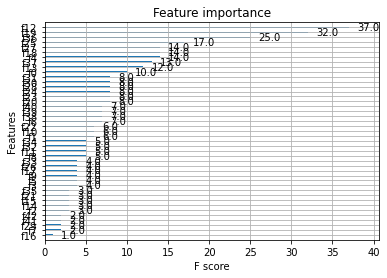

In [15]:
target=target1[4]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf4 = ridge(df1,columns,target)
edf4 = enet(df1,columns,target)
xgb4 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e-01, tolerance: 3.298e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.801e-02, tolerance: 3.199e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 1.5699213743209839, 'f1': 1.414188027381897, 'f2': 0.3527637720108032, 'f3': 0.19645626842975616, 'f4': 3.410613775253296, 'f5': 1.9629096984863281, 'f6': 3.819101095199585, 'f7': 1.3423972129821777, 'f8': 0.9491673707962036, 'f9': 2.60159969329834, 'f10': 8.927931785583496, 'f11': 55.31755447387695, 'f12': 4.949484825134277, 'f13': 2.2097370624542236, 'f14': 1.0936005115509033, 'f15': 1.4786990880966187, 'f17': 0.9110661149024963, 'f18': 1.5610482692718506, 'f19': 2.867344617843628, 'f20': 15.651859283447266, 'f21': 3.1545963287353516, 'f22': 4.069397926330566, 'f23': 3.533562183380127, 'f24': 4.383841514587402, 'f25': 9.758666038513184, 'f26': 0.5718353986740112, 'f27': 6.425612449645996, 'f28': 13.770371437072754, 'f29': 2.544426441192627, 'f30': 0.9498321413993835, 'f31': 0.42067763209342957, 'f32': 2.516719341278076, 'f33': 4.363247394561768, 'f34': 0.1746976375579834, 'f35': 5.620494365692139, 'f36': 0.725694477558136, 'f37': 2.737405776977539, 'f38': 4.174884796142578, 'f

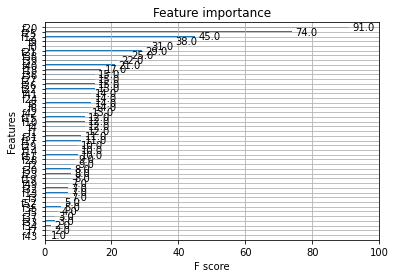

In [16]:
target=target1[5]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf5 = ridge(df1,columns,target)
edf5 = enet(df1,columns,target)
xgb5 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.034e-02, tolerance: 2.619e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.277e-02, tolerance: 2.608e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 1.9541999101638794, 'f1': 2.5135462284088135, 'f2': 2.229121208190918, 'f3': 2.480008602142334, 'f4': 2.4297640323638916, 'f5': 7.950611591339111, 'f6': 1.0210540294647217, 'f7': 1.3277404308319092, 'f8': 1.2693344354629517, 'f9': 3.829754114151001, 'f10': 2.37707781791687, 'f11': 0.3912806808948517, 'f12': 2.287489652633667, 'f13': 3.5081233978271484, 'f14': 1.7416901588439941, 'f15': 3.868565559387207, 'f17': 1.2643035650253296, 'f18': 9.337469100952148, 'f19': 4.112982749938965, 'f20': 13.036176681518555, 'f21': 13.232583999633789, 'f22': 15.038407325744629, 'f23': 0.5564407706260681, 'f24': 5.8619065284729, 'f25': 1.5626851320266724, 'f26': 1.3499125242233276, 'f27': 4.047653675079346, 'f28': 0.4407743811607361, 'f29': 6.675027847290039, 'f30': 0.7358850240707397, 'f31': 1.0868512392044067, 'f32': 0.8536054491996765, 'f33': 4.116385459899902, 'f34': 3.4689719676971436, 'f35': 1.2641493082046509, 'f36': 0.42578333616256714, 'f37': 0.49490121006965637, 'f38': 7.180883407592773

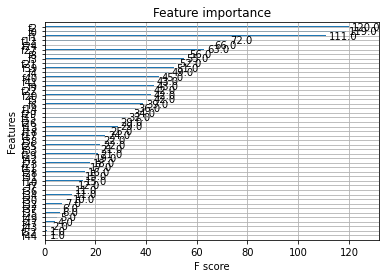

In [17]:
target=target1[6]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf6 = ridge(df1,columns,target)
edf6 = enet(df1,columns,target)
xgb6 = random_search(df1,columns,target)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.306e-02, tolerance: 2.272e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e-02, tolerance: 2.280e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'f0': 1.5643541812896729, 'f1': 2.149446487426758, 'f2': 1.6940898895263672, 'f3': 1.6002827882766724, 'f4': 2.078798294067383, 'f5': 4.3950090408325195, 'f6': 3.1080262660980225, 'f7': 3.2707631587982178, 'f8': 3.301065683364868, 'f9': 2.995142698287964, 'f10': 4.667178630828857, 'f11': 1.4444340467453003, 'f12': 2.8410873413085938, 'f13': 4.197521686553955, 'f14': 2.616702079772949, 'f15': 2.1840529441833496, 'f17': 2.923189163208008, 'f18': 3.537743091583252, 'f19': 2.6694018840789795, 'f20': 2.9533159732818604, 'f21': 3.9698219299316406, 'f22': 4.683852672576904, 'f23': 3.356102466583252, 'f24': 2.639124870300293, 'f25': 3.6361570358276367, 'f26': 4.027606964111328, 'f27': 2.331247568130493, 'f28': 2.632887363433838, 'f29': 2.901167631149292, 'f30': 2.494178533554077, 'f31': 2.178807020187378, 'f32': 4.4511799812316895, 'f33': 3.015232801437378, 'f34': 4.320154190063477, 'f35': 3.7045223712921143, 'f36': 3.2213871479034424, 'f37': 2.8438119888305664, 'f38': 3.5805532932281494, 'f3

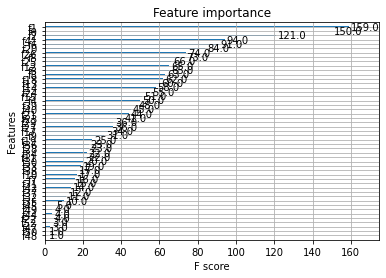

In [18]:
target=target1[7]
columns = [i for i in features if i not in target1]    

xl=pd.ExcelFile('Zmb_social_media_dim_reduced_results.xlsx')
d1=pd.read_excel(xl,f'E-{target}')
for i in d1.columns:
    if (d1[i] == 0).all()==True:
        columns.remove(i)
columns.insert(0,target)
df1=df[columns]
columns.remove(target)
df1=object.fit_transform(df1)
rdf7 = ridge(df1,columns,target)
edf7 = enet(df1,columns,target)
xgb7 = random_search(df1,columns,target)

In [19]:
with pd.ExcelWriter("Zmb_Social_media_results.xlsx") as writer:
    rdf0.to_excel(writer, sheet_name="RDF0", index=False)
    edf0.to_excel(writer, sheet_name="EDF0", index=False)
    xgb0.to_excel(writer, sheet_name="XGB0", index=False)
    rdf1.to_excel(writer, sheet_name="RDF1", index=False)
    edf1.to_excel(writer, sheet_name="EDF1", index=False)
    xgb1.to_excel(writer, sheet_name="XGB1", index=False)
    rdf2.to_excel(writer, sheet_name="RDF2", index=False)
    edf2.to_excel(writer, sheet_name="EDF2", index=False)
    xgb2.to_excel(writer, sheet_name="XGB2", index=False)
    rdf3.to_excel(writer, sheet_name="RDF3", index=False)
    edf3.to_excel(writer, sheet_name="EDF3", index=False)
    xgb3.to_excel(writer, sheet_name="XGB3", index=False)
    rdf4.to_excel(writer, sheet_name="RDF4", index=False)
    edf4.to_excel(writer, sheet_name="EDF4", index=False)
    xgb4.to_excel(writer, sheet_name="XGB4", index=False)
    rdf5.to_excel(writer, sheet_name="RDF5", index=False)
    edf5.to_excel(writer, sheet_name="EDF5", index=False)
    xgb5.to_excel(writer, sheet_name="XGB5", index=False)
    rdf6.to_excel(writer, sheet_name="RDF6", index=False)
    edf6.to_excel(writer, sheet_name="EDF6", index=False)
    xgb6.to_excel(writer, sheet_name="XGB6", index=False)
    rdf7.to_excel(writer, sheet_name="RDF7", index=False)
    edf7.to_excel(writer, sheet_name="EDF7", index=False)
    xgb7.to_excel(writer, sheet_name="XGB7", index=False)

    